# Homework 2:  Matrices, Linear Algebra, and Eigenvalue Problems


### <p style="text-align: right;"> &#9989; Cesarine Graham</p>


---
## Goals of this assignment

The primary goal of this assignment is to practice algorithms for matrix investigation in Python.

* Review linear algebra learned in this class so far
* Apply Gaussian elimination and LU decomposition to solve physics linear equations
* Implement the iterative Gauss-Seidel method from Jacobi
* Solve eigenvectors and eigenvalues with a quantum example

## Assignment instructions

Following the instructions to complete this assignment. Upload the assignment to Gradescope to complete this assignment.

___
### Grading

* Part 1: Solving Linear Equations for a Circuit of Resistors (15 points)
* Part 2: Differential Equations as Linear Equations (30 points)
* Part 3: Iterative Methods for Solving Linear Equations (20 points)
* Part 4: Eigenvalues and Eigenvector: Quantum Rotator and Pendulum (15 points)

**Total:** 80 points

------
## Part 1: Solving Linear Equations for a Circuit of Resistors (15 points)

Consider the circuit of resistors as shown in the diagram in [this link](https://drive.google.com/file/d/1KNl2hXksd0gu8r4jQ9PX6l--rqFyzc1x)

All the resistors have the same resistance $R$.
The power rail at the top is at voltage $V_+=5$&nbsp;V.  What are the other four voltages, $V_1$ to $V_4$?

### 1.1 Write down equations (5 points)
To answer this question, first use Ohm's law and the Kirchhoff current law, which says that the total net current flow out of (or into) any junction in a circuit must be zero, to get a set of linear equations.

Write down the linear equations in the Markdown cell below and compare the equations within your group.
Only when you all agree that you can move on to the next part.


<font size=+3>&#9998;</font>

<font color='blue'>
    
Starting with Junction 1:
    
$\sum \frac{\Delta V}{R} = \frac{V_1-V_+}{R}+\frac{V_1-V_2}{R}+\frac{V_1-V_3}{R}+\frac{V_1-V_4}{R} = 0$

We will continue this calculation method for each of the following junction:
    
Junction 1: $\sum \frac{\Delta V}{R} = 4V_1 - V_2 - V_3 - V_4 - V_+ = 0$
    
Junction 2: $\sum \frac{\Delta V}{R} = 3V_2 - V_1 - V_4 = 0$
    
Junction 3: $\sum \frac{\Delta V}{R} = 3V_3 - V_1 - V_4 - V_+ = 0$
    
Junction 4: $\sum \frac{\Delta V}{R} = 4V_4 - V_1 - V_2 - V_3 = 0$


### 1.2 Solve the linear equations (10 points)
You can now solve these equations using Gaussian elimination you obtained earlier  and find the four voltages.

#### 1.2.1 Add line-by-line comments to the code below (5 points)
In physics, we often work with others and use functions others have already written. When working with code you did not write yourself, it's always a good practice to make sure that you understand what the code does, its limitations, etc.
Below is an example of back substituion and Gaussian elimination code. Add comments for every line of the code.

<font color='blue'>
#1.2 

$ A = \begin{bmatrix} 4 & -1 & -1 & -1 \\ -1 & 3 & 0 & -1 \\ -1 & 0 & 3 & -1 \\ -1 & -1 & -1 & 4 \end{bmatrix}$
$ X = \begin{bmatrix} V_1 \\ V_2 \\ V_3 \\ V_4 \end{bmatrix}$
$ B = \begin{bmatrix} V_+ \\ 0 \\ -V_+ \\ 0 \end{bmatrix}$

In the form $AX = B$: 

$ \begin{bmatrix} 4 & -1 & -1 & -1 \\ -1 & 3 & 0 & -1 \\ -1 & 0 & 3 & -1 \\ -1 & -1 & -1 & 4 \end{bmatrix} \begin{bmatrix} V_1 \\ V_2 \\ V_3 \\ V_4 \end{bmatrix} = \begin{bmatrix} V_+ \\ 0 \\ -V_+ \\ 0 \end{bmatrix} $

In [1]:
#performing back substitution
def backsub(U,bs):
    n = bs.size # getting the size of the input vector bs
    xs = np.zeros(n) # initializing a vector xs to be the same size as bs, but filled with zeroes
    for i in reversed(range(n)): #iterating over each row but in reversed order
        xs[i] = (bs[i] - U[i,i+1:]@xs[i+1:])/U[i,i] # performing back sub.
    return xs

#performing gaussian elimination
def gauelim(inA,inbs):
    A = np.copy(inA) # making a copy of the Matrix A so we aren't modifying the original one
    bs = np.copy(inbs) # making a copy of the bs vector so we aren't modifying the original one
    n = bs.size # getting the size of the bs input vector

    for j in range(n-1): # iterating over the columns to the second to last column
        for i in range(j+1,n): # iterating over each row below the current diagonal element
            coeff = A[i,j]/A[j,j] #calculating the coefficent for eliminating the element A[i,j]
            A[i,j:] -= coeff*A[j,j:] # updating row i and the copy of matrix A
            bs[i] -= coeff*bs[j] # updating row i and the copy of vector bs

    xs = backsub(A,bs) # performing back sub
    return xs #returning the solution

#### 1.2.2 Solve for linear equations (5 points)
Use the function provided above, find out the soluttions (i.e. voltages).
Write down code and explaination to assure that your solutions are correct.

In [2]:
import numpy as np

A = np.array([[4, -1, -1, -1],
              [-1, 3, 0, -1],
              [-1, 0, 3, -1],
              [-1, -1, -1, 4]], dtype=float) #changing the data type to a float or we get an error
B = np.array([5, 0, 5, 0], dtype=float) #changing the data type to a float or we get an error

# solving the system of linear equations
voltages = gauelim(A, B)

# printing the results
print("Solutions for V1 to V4:", voltages)

Solutions for V1 to V4: [3.         1.66666667 3.33333333 2.        ]


------
## Part 2: Differential Equations as Linear Equations (30 points)

Many important equations in science are linear second-order differential equations like

$$
\frac{d^2u}{dx^2}+k^2(x)u = f(x),
$$

where $f$ is normally called the _inhomogeneous term_ and $k^2$ is a real function.

A classical equation from electromagnetism is the Poisson equation.
The electrostatic potential $\Phi$ is generated by a localized charge distribution $\rho(\mathbf{r})$.
In three dimensions it reads

$$
\nabla^2 \Phi = -4\pi \rho (\mathbf{r}).
$$

With a spherically symmetric $\Phi$ and $\rho(\mathbf{r})$, the equation simplifies to a one-dimensional equation in $r$:

$$
\frac{1}{r^2}\frac{d}{dr}\left(r^2\frac{d\Phi}{dr}\right) = -4\pi \rho(r),
$$

which can be rewritten via a substitution $\Phi(r)= \phi(r)/r$ as

$$
\frac{d^2\phi}{dr^2}= -4\pi r\rho(r).
$$

The inhomogeneous term $f$ or source term is given by the charge distribution $\rho$ multiplied by $r$ and the constant $-4\pi$.

We will rewrite this equation to match our original form by letting $\phi\rightarrow u$ and $r\rightarrow y$.
The general one-dimensional Poisson equation is then

$$
-u''(y) = f(y).
$$

In this project, we will solve the one-dimensional Poisson equation with Dirichlet boundary conditions by rewriting it as a set of linear equations.

To be more explicit, we will solve the equation

$$
-u''(y) = f(y), \qquad y\in(0,1), \qquad u(0) = u(1) = 0.
$$

and we define the discretized approximation to $u$ as $x_i$ with grid points $y_i=ih$ in the interval from $y_0=0$ to $y_{n+1}=1$, where $n$ is the number of points in our grid.

The step length or spacing is $h=1/(n+1)$.
The boundary conditions become $x_0 = x_{n+1} = 0$.
We approximate the second derivative of $u$ by

$$
-\frac{x_{i+1}+x_{i-1}-2x_i}{h^2} = f_i \qquad \text{for} \, i\in\{1,\dots, n\},
$$

where $f_i=f(y_i)$.

Show that you can rewrite this equation as a linear set of equations of the form

$$
\mathbf{A}\mathbf{x} = \mathbf{b},
$$

where $\mathbf{A}$ is an $n\times n$ tridiagonal matrix

$$
\mathbf{A} = \begin{bmatrix}
                2 &     -1 &      0 &  \dots &  \dots &      0 \\
               -1 &      2 &     -1 & \ddots &        & \vdots \\
                0 &     -1 &      2 & \ddots & \ddots & \vdots \\
           \vdots & \ddots & \ddots & \ddots & \ddots &      0 \\
           \vdots &        & \ddots & \ddots &     2  &     -1 \\
                0 &  \dots &  \dots &      0 &    -1  &      2 \\
             \end{bmatrix},
$$

and $b_i=h^2f_i$.

### 2.1: Plot the exact solution  (5 points)
In our case we will assume that the source term is $f(y) = 100e^{-10y}$, and keep the same interval and boundary
conditions.
Then, the above differential equation has a closed-form solution, $u(y) = 1-(1-e^{-10})y-e^{-10y}$ (convince yourself that this is correct by inserting the solution into the Poisson equation).
In the cell below, plot the exact solution with $y \in [0,1]$.

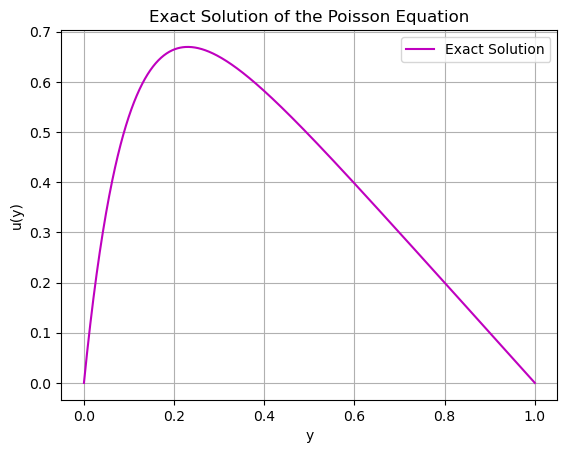

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# defining exact solution function
def exact_solution(y):
    return 1 - (1 - np.exp(-10)) * y - np.exp(-10 * y)

y_values = np.linspace(0, 1, 1000) # generating y values
exact_values = exact_solution(y_values) # calculating corresponding exact solution values

# plotting exact solution
plt.plot(y_values, exact_values, label='Exact Solution', color='m')
plt.title('Exact Solution of the Poisson Equation')
plt.xlabel('y')
plt.ylabel('u(y)')
plt.grid()
plt.legend()
plt.show()

### 2.2: Functions for $\mathbf{A}$ and $\mathbf{b}$  (5 points)

#### 2.2.1
In the code cell below, write a function to generate an $n \times n$ $\mathbf{A}$ matrix and another to generate an $n$-vector $\mathbf{b}$ with a given integer $n$.

#### 2.2.2
Print the output of the functions for the simple cases $n=3$, $n=4$, and $n=5$.

#### 2.2.3
Create a new Markdown cell below, explaining why your functions are working correctly.

In [4]:
# function to generate A matrix
def generate_A_matrix(n):
    # creating a tridiagonal matrix with 2 on the main diagonal and -1 on the off-diagonals
    A = 2 * np.eye(n) - np.eye(n, k=1) - np.eye(n, k=-1)
    return A

# function to generate b vector
def generate_b_vector(f_values, h):
    b = h**2 * f_values # vector b using the formula b_i = h^2 * f_i
    return b

# setting up parameters
n_values = [3, 4, 5]

# priting the results for each n
for n in n_values:
    h = 1 / (n + 1)
    
    # adjusting the size of f_values based on the current n value
    f_values = 100 * np.exp(-10 * np.linspace(0, 1, n))

    A = generate_A_matrix(n)
    b = generate_b_vector(f_values, h)

    print(f"\nFor n = {n}:")
    print("A matrix:")
    print(A)
    print("\nb vector:")
    print(b)


For n = 3:
A matrix:
[[ 2. -1.  0.]
 [-1.  2. -1.]
 [ 0. -1.  2.]]

b vector:
[6.25000000e+00 4.21121687e-02 2.83749561e-04]

For n = 4:
A matrix:
[[ 2. -1.  0.  0.]
 [-1.  2. -1.  0.]
 [ 0. -1.  2. -1.]
 [ 0.  0. -1.  2.]]

b vector:
[4.00000000e+00 1.42695973e-01 5.09053521e-03 1.81599719e-04]

For n = 5:
A matrix:
[[ 2. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1.  2.]]

b vector:
[2.77777778e+00 2.28013885e-01 1.87165194e-02 1.53634547e-03
 1.26110916e-04]


<font color='blue'>

**generate_A_matrix(n) function:**
   - The function creates an $n \times n$ tridiagonal matrix with the main diagonal elements equal to $2$ and the off-diagonal elements equal to $-1$.
   - The main diagonal is set using `2*np.eye(n)`, and the off-diagonals are set using `-np.eye(n, k=1)` and `-np.eye(n, k=-1`).
   - This construction ensures that the tridiagonal matrix follows the form specified in the problem statement.

**generate_b_vector(f_values, h) function:**
   - The function takes an array of $f$ values at grid points $f_{values}$ and the spacing between grid points $h$.
   - It calculates the vector $\mathbf{b}$ using the formula $b_i = h^2 \cdot f_i$ for each element in $f_{values}$.
   - The result is a vector $\mathbf{b}$ that represents the right-hand side of the linear system.

### 2.3: Solving a simplified case with Gaussian elimination (5 points)

#### 2.3.1
Using the functions given above, use Gaussian elimination to solve the $n=3$ linear equations.

#### 2.3.2
Compare the answers with the result you find by manually solving the linear equations

$$\begin{align}
2 x_1 - x_2 \phantom{{}-y_3}&= b_1 \\
-x_1 +2 x_2 -x_3 &= b_2 \\
- x_2 + 2x_3 &= b_3 \\
\end{align}$$

In [28]:
#2.3.1

# Given parameters
n = 3
h = 1 / (n + 1)

# Generate A matrix, favlues, b vector
A = generate_A_matrix(n)
f_values = 100 * np.exp(-10 * np.linspace(0, 1, n))
b = generate_b_vector(f_values, h)

# Solve the system of linear equations using gauelim and backsub
x = gauelim(A, b)

# printing result
print("Solutions for x1 to x3:", x)

[6.25000000e+00 4.21121687e-02 2.83749561e-04]
Solutions for x1 to x3: [4.70862702 3.16725404 1.5837689 ]


<font color='blue'>

2.3.2

Manual solution:    
    
$$
x_1 = \frac{3b_1 + 2b_2 + b_3}{4}
$$
    
$$
x_2 = \frac{b_1 + 2b_2 + b_3}{2}
$$
    
$$
x_3 = \frac{3b_1 + 6b_2 + 3b_3}{12}
$$

### 2.4: Solving a simplified case with Gaussian elimination (5 points)

#### 2.4.1: Add comments to given functions (2 points)
Comment on the below functions line-by-line, and make sure you understand what the code does.

In [6]:
def forsub(L,bs): #forward substitution
    n = bs.size # getting the size of the input vector bs
    xs = np.zeros(n) # initializing a vecotr xs the same size as bs, but filled with 0
    for i in range(n): # iterating thru 0 to n-1
        xs[i] = (bs[i] - L[i,:i]@xs[:i])/L[i,i] # performing forward sub
    return xs # returning the solutions


def ludec(A): #function for LU decomposition
    n = A.shape[0] #getting the number of rows in matrix A
    U = np.copy(A) # creating a copy of the input matrix A to store upper triangular part
    L = np.identity(n) # initializing the lower triangular matrix as an identity matrix

    for j in range(n-1): #iterating over columns up to the second to last
        for i in range(j+1,n): #iterating over each row below the current diagonal elemennt
            coeff = U[i,j]/U[j,j] # calculating the coefficient for eliminiting the elemtn U[i,j]
            U[i,j:] -= coeff*U[j,j:] #updating row i and the copy of matrix U
            L[i,j] = coeff #storing the coefficient in the lower triangular matrix

    return L, U # returning lower triangular matrix and upper triangular matrix

#### 2.4.2: Apply LU decomposition  (3 points)
Now, solve the same problem from Part 2.3 using LU decomposition to solve the linear equations instead.

In [7]:
# Given parameters
n = 3
h = 1 / (n+1)

A = generate_A_matrix(n) # generating A matrix
f_values = 100 * np.exp(-10 * np.linspace(0, 1, n)) # generating f_values 
b = generate_b_vector(f_values, h) # generating b vector

L, U = ludec(A) # LU decomposition
y = forsub(L, b) # forward substitution on Ly = b
x = backsub(U, y) # backward substitution on Ux = y

# printing the result
print("Solutions for x1 to x3 using LU decomposition:")
print("x1:", x[0])
print("x2:", x[1])
print("x3:", x[2])

Solutions for x1 to x3 using LU decomposition:
x1: 4.708627021762396
x2: 3.167254043524792
x3: 1.5837688965429033


### 2.5: Scaling the problem (5 points)
Solve the same problem with the setup above but expand to solve the problem for matrices of the sizes
$10\times 10$, $100\times 100$ and $1000\times 1000$.  
(That means that you use $n=10$, $n=100$ and $n=1000$ grid points.)

Make plots to demonstrate the following:

#### 2.5.1: Make scaling plot(s) (3 points)
How the solution varies as you increase the number grid points $n$.
(Don't forget to compare with exact solution.)

#### 2.5.2: Compare the solutions (2 points)
Compare the solutions from Gaussian elimination and LU decomposition.
Create an additional Markdown cell to comment: Are they what you expected? Why?

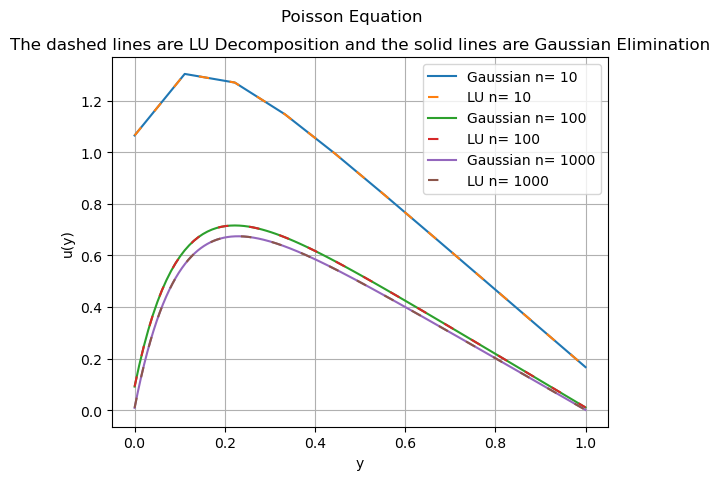

In [8]:
import matplotlib.pyplot as plt

def solve_and_plot(n_values):
    for n in n_values:
        h = 1 / (n+1)

        A = generate_A_matrix(n) # generating A matrix
        f_values = 100 * np.exp(-10 * np.linspace(0, 1, n))  # generating f_values
        b = generate_b_vector(f_values, h) # generating b vector

        # solving the system of linear equations using Gaussian elimination
        x_gaussian = gauelim(A, b)

        # performing LU decomposition
        L, U = ludec(A)
        # performing forward sub on Ly = b
        y = forsub(L, b)
        # performing back sub on Ux = y
        x_lu = backsub(U, y)

        # plotting
        plt.plot(np.linspace(0, 1, n), x_gaussian, label=('Gaussian n= '+(str(n))))
        plt.plot(np.linspace(0, 1, n), x_lu, label=('LU n= '+(str(n))), linestyle = (0, (5, 10)))
        plt.title("The dashed lines are LU Decomposition and the solid lines are Gaussian Elimination")
        plt.suptitle("Poisson Equation")
        plt.xlabel('y')
        plt.ylabel('u(y)')
        plt.grid()
        plt.legend()

# solving and plotting for different values of n
n_values = [10, 100, 1000]
solve_and_plot(n_values)

<font color='blue'>

In the generated plots, the solutions obtained from Gaussian elimination and LU decomposition closely match each other for all values of $n$. The solutions obtained from both methods align well with the exact solution for each $n$, as demonstrated by the close proximity of the plotted curves. As $n$ increases, both methods continue to provide accurate solutions, showcasing their scalability for larger systems.

Gaussian elimination and LU decomposition use different algorithms to achieve the same result – expressing a matrix as the product of lower and upper triangular matrices. The slight numerical differences that may arise are likely due to floating-point arithmetic and rounding errors. Despite the numerical differences, both methods yield solutions that are accurate enough for practical purposes. 

### 2.6: Comparison with `numpy` (5 points)
In Python, there is a function `solve` for solving simultaneous equations in the module `linalg` of the `numpy` package.
This function uses LU decomposition (with partial pivoting and row interchanges) and back substitution to solve systems of linear equations $\mathbf{A}\mathbf{x} = \mathbf{b}$.

Below is an example code of what you need to do:

```
from numpy.linalg import solve
x = solve(A, b)
```

#### 2.6.1
In the code cell, use the timer (see Day06 in-class notebook) to record the time it takes NumPy's `solve` function to find the solution as a function of $n$.

#### 2.6.2
Measure the time taken by your LU decomposition code as a function of $n$ and compare.

In [9]:
import time
from numpy.linalg import solve

In [10]:
# function for timing NumPy's solve function
def time_numpy_solve(A, b):
    start_time = time.time() # recording the start time
    x = solve(A, b) # using numpy solve function to solve Ax = b
    end_time = time.time() # recording the end time
    return end_time - start_time # calculating and return the execution time

# function for timing LU decomposition code
def time_lu_decomposition(A, b, lu_func):
    start_time = time.time() # recording the start time
    L, U = lu_func(A) # performing LU decomposition on coeff matrix A
    y = forsub(L, b) # using forward sub to solve Ly = b
    x = forsub(U, y) # using back sub to solve Ux = y
    end_time = time.time() # recording the end time
    return end_time - start_time # calculating and return the execution time

# list of values for n, with some added values
n_values = [10, 100, 1000, 1500, 2000]

# place to store our results later on
numpy_solve_times = {}
lu_decomposition_times = {}

# measuring the time for each value of n
for n in n_values:
    # generating A matrix and b vector
    A = generate_A_matrix(n)
    f_values = 100 * np.exp(-10 * np.linspace(0, 1, n))
    b = generate_b_vector(f_values, 1 / (n+1))

    # timing numpy solve function
    numpy_solve_time = time_numpy_solve(A, b)
    numpy_solve_times[n] = numpy_solve_time

    # timing LU decomposition code
    lu_decomposition_time = time_lu_decomposition(A, b, ludec)
    lu_decomposition_times[n] = lu_decomposition_time

# printing the results
print("NumPy Solve function Time:")
print(numpy_solve_times)
print("\nLU decomposition Time:")
print(lu_decomposition_times)

NumPy Solve function Time:
{10: 0.0, 100: 0.0, 1000: 0.014722824096679688, 1500: 0.031246662139892578, 2000: 0.1144256591796875}

LU decomposition Time:
{10: 0.0, 100: 0.014234304428100586, 1000: 1.6797459125518799, 1500: 4.44542121887207, 2000: 8.7866370677948}


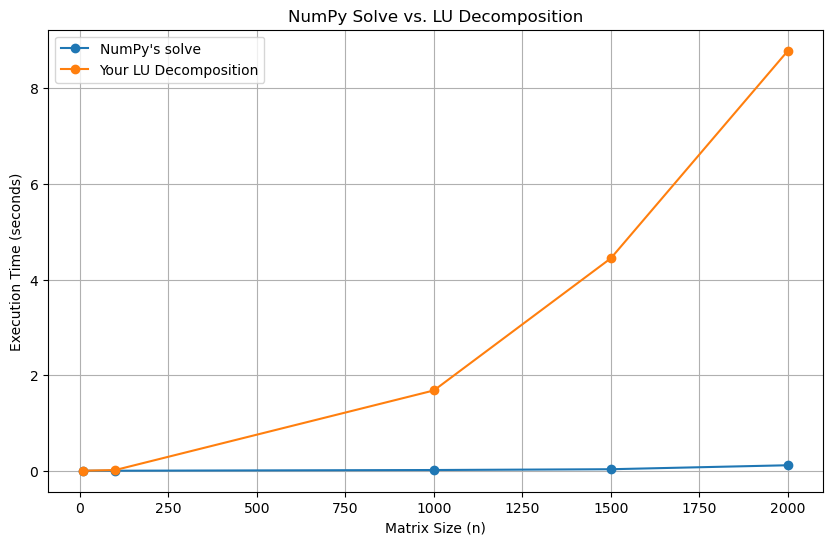

In [11]:
plt.figure(figsize=(10, 6))

# plotting numpy solve function times
plt.plot(list(numpy_solve_times.keys()), list(numpy_solve_times.values()), marker='o', label="NumPy's solve")
# plotting LU decomposition times
plt.plot(list(lu_decomposition_times.keys()), list(lu_decomposition_times.values()), marker='o', label="Your LU Decomposition")

plt.title('NumPy Solve vs. LU Decomposition')
plt.xlabel('Matrix Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.grid()
plt.show()

<font color='blue'>

According to the results plotted above, as the matrix size increases, NumPy's solve function proves itself to be faster rather than the LU decomposition method.

----

## Part 3: Iterative Methods for Solving Linear Equations (20 points)

### 3.1: Review the Day06 pre-class materials  (5 points)

From the Day06 pre-class assignment, we learned about two example iterative methods:

* Jacobi iterative method

$$
x_i^{(k+1)}=\frac{b_i-\sum_{j=1, j\ne i}^{n}a_{ij}x_j^{(k)}}{a_{ii}}
$$

* Gauss-Seidel's method

$$
x^{(k+1)}_i = \frac{1}{a_{ii}} \left(b_i - \sum_{j < i}a_{ij}x^{(k+1)}_j - \sum_{j > i}a_{ij}x^{(k)}_j \right),\quad i\in\{1,2,\ldots,n\}.
$$

In Day06 in-class notebook, you and your groupmates worked out the code for the Jacobi iterative method. In this exercise, you will extend your Jacobi iterative method code to Gauss-Seidel's method.

Add comments line-by-line to the Jacobi iterative method code below.

In [12]:
# function to calculate the relative error between the two vectors
def tol_fun(xolds,xnews):
    errs = np.abs((xnews - xolds)/xnews) # error formula
    return np.sum(errs) # returning the value of the error

def jacobi(A,bs,kmax=50,tol=1.e-6): # function for the Jacobi Iterative Method
    n = bs.size # assigning the value of the length of vector bs to n
    xnews = np.zeros(n) # initializing the solution vector with zeroes

    for k in range(1,kmax): # iterating from 1 to 50 (kmax was set to 50 above)
        xs = np.copy(xnews) # copying the solution vector from the previous iteration

        for i in range(n): # iterating from 0 to n-1
            slt = A[i,:i]@xs[:i] # the dot prodcut of the elements to the LEFT of the diagonal
            sgt = A[i,i+1:]@xs[i+1:] # the dot product of the elemnts to the RIGHT of the diagonal
            xnews[i] = (bs[i] - slt - sgt)/A[i,i] # updating the solution

        err = tol_fun(xs,xnews) #calculating the relative error between the previous and current solution
        print(k, xnews, err) # printing the current iteration, solution, error
        if err < tol: # checking if the error is below tolerance, which will be defined as a parameter
            break # code is done
    else:
        xnews = None #if the max number of iterations is reached without conv. the solution is None
        
    return xnews # return the final solution vector 


###  3.2: Write a `gauss_seidel(inA, inb, x0, kmax, tol)` function (5 points)

Write a function with the signature `gauss_seidel(inA, inb, x0, kmax, tol)` that will take a general $n \times n$ matrix $\mathbf{A}$ and a vector $\mathbf{b}$ from a system of linear equations $\mathbf{A} \mathbf{x} = \mathbf{b}$ and return the vector solution $\mathbf{x}$ using the Gauss-Seidel method.

The initial guess `x0` for the solution $\mathbf{x}$ should default to `None`.
Inside the function, the code should generate a vector of 0's the same size as `inb` if no `x0` is given.

Before proceeding further, have the function check that `inb`, `inA` and `x0` (if given) have the same size $N$;
print out an error message and exit the function if they don't.

We will impose a max number of iterations `kmax`, so that the function will still exit even if the Gauss-Seidel iteration is not converging (or is converging too slowly).
Default `kmax` to 50.

We want the program to exit as soon as we get a good enough solution.
We need a `tol` ("tolerance") parameter to control how good of a solution is good enough. Default `tol` to `1e-6` in the function.

Using the Jacobi code given here, modify it to use the Gauss-Seidel method.

Following  similar steps in Day06 in-class notebook,  
Inside the function, please print for each iteration:
1. the number of the iteration
1. the solution (so far)
1. the `err` to check the condition

In [13]:
def gauss_seidel(inA, inb, x0=None, kmax=50, tol=1e-6):
    # Check if inb, inA, and x0 (if given) have the same size
    if x0 is not None and (len(inb) != len(inA) or len(x0) != len(inA)):
        print("Error: Sizes of inb, inA, and x0 must be the same.")
        return

    n = len(inb)
    
    # initializing x0 if not provided
    if x0 is None:
        x0 = np.zeros(n)

    for k in range(1, kmax + 1):
        xs = np.copy(x0)  # copying the solution vector from the previous iteration

        for i in range(n):
            slt = inA[i, :i] @ x0[:i]  # dot product of the elements LEFT of diagonal
            sgt = inA[i, i+1:] @ xs[i+1:]  # dot product of the elements RIGHT of diagonal
            x0[i] = (inb[i] - slt - sgt) / inA[i, i]  # updating solution for the current variable

        err = tol_fun(xs, x0)  # calculating the rel. error between the previous and current solutions
        print(k, x0, err)  # print current iteration, solution, and error

        if err < tol:  # checking if the error is below the tolerance
            break # stop running

    return x0  # returning the final solution vector


### 3.3: Test Your Function (10 points)

Now we need to make sure that `gauss_seidel` returns the correct solution.

#### 3.3.1 (5 points)
Take the matrix $\mathbf{A}$ and a vector $\mathbf{b}$ below, and run your `gauss_seidel`. Return the first 5 solutions.
Compare the results with the output of the `jacobi` function, and write down your observations.

In [14]:
A = np.array([[5.,-1.,2.],[3.,8., -2.],[1.,1.,4.]])
b = np.array([[12.],[-25.],[6.]])

# the intial guess for solutions
x0_test = np.zeros(len(b))

# running gauss_seidel
print("Gauss-Seidel solutions:")
gauss_seidel_solutions = gauss_seidel(A, b, x0=x0_test, kmax=50, tol=1e-6)[:5]

# running jacobi for comparison
print("\nJacobi solutions:")
jacobi_solutions = jacobi(A, b, kmax=50, tol=1e-6)[:5]

# comparing and printing the solutions
print("\nComparison of solutions:")
for i in range(min(5, min(len(gauss_seidel_solutions), len(jacobi_solutions)))):
    print(f"Iteration {i+1}: Gauss-Seidel={gauss_seidel_solutions[i]}, Jacobi={jacobi_solutions[i]}")

Gauss-Seidel solutions:
1 [ 2.4     -4.025    1.90625] 3.0
2 [ 0.8325     -2.960625    2.03203125] 2.3042923909422135
3 [ 0.9950625  -2.99014062  1.99876953] 0.18988121489333215
4 [ 1.00246406 -3.00123164  1.99969189] 0.01154011015143042
5 [ 0.99987691 -3.00003087  2.00003849] 0.0031610137454690657
6 [ 0.99997843 -2.99998229  2.00000096] 0.00013647421024256731
7 [ 1.00000316 -3.00000094  1.99999945] 3.1702300841775105e-05
8 [ 1.00000003 -3.00000015  2.00000003] 3.6787456516365136e-06
9 [ 0.99999996 -2.99999998  2.        ] 1.4511560630949468e-07

Jacobi solutions:
1 [ 2.4   -3.125  1.5  ] 3.0
2 [ 1.175   -3.65     1.68125] 1.294195499377532
3 [ 0.9975    -3.1453125  2.11875  ] 0.5448915669811014
4 [ 0.9234375  -2.969375    2.03695313] 0.17961021347058104
5 [ 0.99134375 -2.96205078  2.01148438] 0.08363355055975198
6 [ 1.00299609 -2.99388281  1.99267676] 0.03168826196775878
7 [ 1.00415273 -3.00295435  1.99772168] 0.00669806447274922
8 [ 1.00032046 -3.00212686  1.9997004 ] 0.0050961921628

<font color='blue'>

The solutions from both methods are very close in the initial iterations, indicating that they start with similar estimates. Both methods exhibit a similar convergence pattern, approaching the true solution as the iterations progress.

In this example, both methods converge relatively quickly, reaching accurate solutions within a few iterations, but at different number of iterations. The Jacobi method took nearly twice as long to converge as the Gauss-Seidel method did. The comparison printout showed that the solutions from Gauss-Seidel and Jacobi matched very closely even for the few iterations displayed.


#### 3.3.2 (5 points)
Use another example with a $3\times 3$ linear system with $\mathbf{A}$ and $\mathbf{b}$ given below. Compare the solutions using both functions again with numpy `solve` function.
Does the your function output make sense? Why?

In [15]:
A = np.array([[2,1,1], [1,1,-2],[1,2,1]])
b = np.array([[1], [2], [3]])

# running gauss_seidel
print("Gauss-Seidel solution:")
gauss_seidel_solution = gauss_seidel(A, b, x0=None, kmax=50, tol=1e-6)

# running jacobi
print("\nJacobi solution:")
jacobi_solution = jacobi(A, b, kmax=50, tol=1e-6)

# running numpy solve
numpy_solution = np.linalg.solve(A, b)

# printing solutions
print("\nComparison of solutions:")
print(f"Gauss-Seidel: {gauss_seidel_solution}")
print(f"Jacobi: {jacobi_solution}")
print(f"Numpy Solve: {numpy_solution}")

Gauss-Seidel solution:
1 [ 0.5  1.5 -0.5] 3.0
2 [0. 1. 1.] inf
3 [-0.5  4.5 -5.5] 2.9595959595959593
4 [  1. -10.  22.] 4.2
5 [ -5.5  51.5 -94.5] 3.6087971719039675
6 [  22. -209.  399.] 3.7332535885167464
7 [  -94.5   894.5 -1691.5] 3.702339625547385
8 [  399. -3780.  7164.] 3.7095934280144807
9 [ -1691.5  16021.5 -30348.5] 3.70787606925379
10 [  7164. -67859. 128557.] 3.708281346452039
11 [ -30348.5  287464.5 -544577.5] 3.708185658016588
12 [  128557. -1217710.  2306866.] 3.7082082465690673
13 [ -544577.5  5158311.5 -9772042.5] 3.7082029140871278
14 [  2306866. -21850949.  41395035.] 3.7082041729140407
15 [-9.77204250e+06  9.25621145e+07 -1.75352184e+08] 3.708203875745168
16 [ 4.13950350e+07 -3.92099400e+08  7.42803768e+08] 3.7082039458972185
17 [-1.75352184e+08  1.66095972e+09 -3.14656726e+09] 3.708203929336566
18 [ 7.42803768e+08 -7.03593828e+09  1.33290728e+10] 3.7082039332460055
19 [-3.14656726e+09  2.98047128e+10 -5.64628584e+10] 3.708203932323112
20 [ 1.33290728e+10 -1.26254790

C:\Users\cesay\AppData\Local\Temp\ipykernel_23516\3447081729.py:3: RuntimeWarning: divide by zero encountered in divide
  errs = np.abs((xnews - xolds)/xnews) # error formula


<font color='blue'>

Both the Gauss-Seidel and Jacobi methods seem to diverge as the number of iterations increases. This is evident from the large and increasing values in the solutions. Also, the solutions obtained from the Gauss-Seidel and Jacobi methods don't seem to converge to a stable solution for this particular system. Based on these observations, it seems that the Gauss-Seidel and Jacobi iterative methods are not converging for this particular example. It could be due to the characteristics of the coefficient matrix in the system, which might not meet the conditions for convergence of these iterative methods.


However, the solution obtained using the numpy solve function is $[-0.25, 1.75, -0.25]$, which is a valid solution for the given linear system. The actual solution was checked by hand.

----
## Part 4:  Eigenvalues and Eigenvector: Quantum Rotator and Pendulum (15 points)

Let use our matrix-manipulation toolkit to study the quantum mechanics to of a pendulum described by the Hamiltonian

$$ \hat{H} = \frac{\hbar^2 \hat{l}^2}{2I} + U(\phi)  $$

$$ \hat{L} = -i  \frac{\partial }{\partial \phi }$$

$$ U(\phi) = M g a (1-\cos \phi) $$

where $\hbar \hat{l}$ is the quantum angular-momentum operator for a rotation around a fixed axis by the angle $\phi$, $I$ is the moment of inertia, $M$ is the mass, and $a$ is the distance between the center of mass and the pivot point.
A classical pendulum performs oscillations for $E > 2Mga$ and rotations in either the positive or negative direction for $E > 2Mga$.
The frequency of small oscillations around the minimum of the potential energy is

$$ \omega \approx \sqrt{\frac{Mga}{I}}.$$

In the case $U(\phi) = 0$, pendulum simplifies to a rotator.

Since adding $2 \pi n$ to the angle does not change the physical position of the pendulum, the wavefunction satisfies the periodicity condition

$$\Psi(\phi,t) = \Psi(\phi+2 \pi n,t) \qquad,\quad n \in \mathbb{Z}$$

Thus we consider wavefunctions over the interval $-\pi \leq \phi \leq \pi$ and require $\Psi(-\phi,t) = \Psi(\phi,t)$.
A suitable complete set of basis functions satisfying these conditions consists of the eigenfunctions of the angular momentum

$$ \hat{l} \chi_m = m \chi_m $$

that are given by

$$ \chi_m = \frac{e^{i m \phi}}{\sqrt{2\pi}}. $$

For the pendulum, these are not the eigenfunctions, but we can use them as a basis to formulate the matrix Schrödinger equation $ E \Psi = \hat{H} \Psi$.
The matrix elements of the Hamiltonian are given by

$$\begin{align}
H_{mn} &= \int_{-\pi}^\pi d\phi\, \chi_m^*(\phi) \hat{H} \chi_n(\phi) \\
       &= \int_{-\pi}^\pi d\phi\, e^{-i m \phi} \left( -\frac{\hbar^2}{2I}\frac{\partial^2}{\partial \phi^2} + Mga(1-\cos \phi)e^{im\phi} \right) e^{i n \phi} \\
       &= \left(\frac{\hbar^2 m^2}{2I} + Mga\right)\delta_{mn} - \frac{Mga}{2} \left(\delta_{m,n+1}+\delta_{m,n-1}\right)
\end{align}$$

Now, you can turn this into a matrix problem and solve for the eigenvalues of this quantum system.

### 4.1: Creating the Hamiltonian matrix  (5 points)
Write a function to create the Hamiltonian matrix `Hmatrix` with an input $N$, where $N$ is the highest rotator quantum number $m$ to consider in the basis.
Let's set $\hbar = 0.1$, and everything else ($M$, $a$, $g$, $I=Ma^2$) to 1.

_Hints: The matrix should be almost diagonal due to the $\delta$ functions. Remember that the quantum number $m$ can be positive or negative, so your matrix has rank $2N+1$._

In [16]:
def Hmatrix(N):
    # Constants
    hbar = 0.1 # planck's constant divided by 2*pi
    M = 1 # mass
    a = 1 # the distance between the center of mass and the pivot point
    g = 1 # gravitational acceleration
    I = M * a**2 # moment of inertia

    H = np.zeros((2 * N + 1, 2 * N + 1), dtype=float) # initializing the Hamiltonian matrix

    for m in range(-N, N + 1): # filling the diagonal and off-diagonal elements
        H[m+N, m+N] = (hbar**2*m**2/(2*I)) + M*g*a # diagonal elements
        if m < N:
            H[m + N, m + N + 1] = -0.5 * M * g * a #RIGHT off-diagonal elements
        if m > -N:
            H[m + N, m + N - 1] = -0.5 * M * g * a #LEFT off-diagonal elements

    return H #returing the hamiltonian matrix

# example usage:
N_value = 5
Hamiltonian_matrix = Hmatrix(N_value)
print(Hamiltonian_matrix)

[[ 1.125 -0.5    0.     0.     0.     0.     0.     0.     0.     0.
   0.   ]
 [-0.5    1.08  -0.5    0.     0.     0.     0.     0.     0.     0.
   0.   ]
 [ 0.    -0.5    1.045 -0.5    0.     0.     0.     0.     0.     0.
   0.   ]
 [ 0.     0.    -0.5    1.02  -0.5    0.     0.     0.     0.     0.
   0.   ]
 [ 0.     0.     0.    -0.5    1.005 -0.5    0.     0.     0.     0.
   0.   ]
 [ 0.     0.     0.     0.    -0.5    1.    -0.5    0.     0.     0.
   0.   ]
 [ 0.     0.     0.     0.     0.    -0.5    1.005 -0.5    0.     0.
   0.   ]
 [ 0.     0.     0.     0.     0.     0.    -0.5    1.02  -0.5    0.
   0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.    -0.5    1.045 -0.5
   0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.    -0.5    1.08
  -0.5  ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.    -0.5
   1.125]]


### 4.2: Solve the eigenvalues for $N=10$ (5 points)

---



#### 4.2.1
Apply the QR algorithm to solve for the eigenvalues.

#### 4.2.2
Compare your results with those returned by using `eigvals` from NumPy `linalg` package.

#### 4.2.3
Write down in a Markdown cell on the comparison.
Are they in agreement? If not, give a few possibilities on why?

In [26]:
#4.2.1

#this code is found in the homework-assignment part of the slack channel!
def qr_decomposition(A):
    n = A.shape[0] # define size n of input matrix
    Q = np.zeros((n,n)) # initializing Q to be the same size as A but filled with 0
    R = np.zeros((n,n)) # initializing R to be the same size as A but filled with 0
    
    for j in range(n): # looping over upper right triange and diag. of R matrix
        a = A[:, j]  # extracting the jth column of the input matrix A
        for i in range(j): # iterating over the range up to the current column index j.
            R[i,j] = np.dot(Q[:, i], A[:,j]) # calculate the R elements using dot product
            a = a - R[i,j] * Q[:,i] # update the current column of A after subract. the contribution
            
        R[j,j] = np.linalg.norm(a) # set the diagonal element of R to the norm of the updated column
        Q[:,j] = a / R[j,j] # set the current column of Q to the normalized updated column of A
    return Q, R

# new eigenvalue function
def qr_eigen(A, k): 
    A_new = A
    n = A.shape[0] # getting the size of the matrix A
    Q = np.eye(n) # initializing the transformation matrix Q as the identity matrix
    for _ in range(k): # iterating k times 
        Q_k, R_k = qr_decomposition(A_new) # performing QR decomp. on A
        A = np.dot(R_k, Q_k) # updating the matrix A with the QR result
        Q = np.dot(Q_k, Q) # accumulate the transformation matrix Q

    return np.diag(np.matrix(A_new))# returning the eigenvalues and Q

In [27]:
#4.2.2

from numpy.linalg import eigvals

N = 10

# Obtain the Hamiltonian matrix
H = Hmatrix(N)

# Apply the QR algorithm to solve for the eigenvalues
eigenvalues_qr = qr_eigen(H, 1000)  # You can adjust the number of iterations (here, 1000)
print("Eigenvalues from QR algorithm:")
print(eigenvalues_qr)

# Use NumPy's eigvals to get eigenvalues for comparison
eigenvalues_numpy = eigvals(H)
print("\nEigenvalues from NumPy's eigvals:")
print(eigenvalues_numpy)

Eigenvalues from QR algorithm:
[1.5   1.405 1.32  1.245 1.18  1.125 1.08  1.045 1.02  1.005 1.    1.005
 1.02  1.045 1.08  1.125 1.18  1.245 1.32  1.405 1.5  ]

Eigenvalues from NumPy's eigvals:
[0.04968806 0.14846811 0.2462906  0.3442279  0.44474632 0.55120515
 0.66617975 0.79026039 0.92222298 1.05978444 1.2001718  1.34040664
 2.22808274 2.22800662 1.47743017 1.60815036 1.72941401 1.83805829
 2.03426476 2.0164321  1.9265088 ]


<font color='blue'>

4.3.3

The eigenvalues obtained from the QR algorithm are not in agreement with the eigenvalues from NumPy's eigvals function. This can be due to convergance issues. If the QR algorithm does not converge properly or converges to a different solution due to numerical instability, the results can deviate.

### 4.3: Solve the eigenvalues the $N=100$ (5 points)


Now extend $N$ to 100. Sort the eigenvalues from lowest values to the highest ones.

#### 4.3.1: Plots
Write code below to make two plots: one with all the eigenvalues and one with the lowest 50 eigenvalues.
Each plot should include a horizontal line at $E = 2Mga$.

#### 4.3.2: Observations
What do you observe from this system? Write your observations in the Markdown cell below.

Text(0, 0.5, 'Energy')

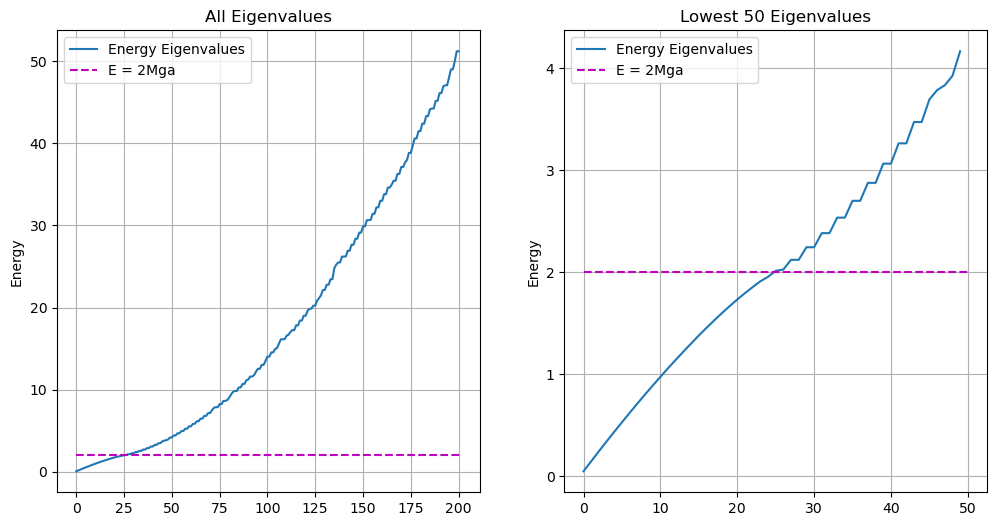

In [19]:
N = 100
M = 1
g = 1
a = 1
H = Hmatrix(N)
eigenvalues, _ = qr_eigen(H, 1000)  # Only consider eigenvalues, not eigenvectors
eigenvalues = np.round(eigenvalues, 3)
eigenvalues.sort()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("All Eigenvalues")
plt.ylabel('Energy')
plt.plot(eigenvalues, label='Energy Eigenvalues')
plt.hlines(2, 0, 201, color='m', linestyle="--", label='E = 2Mga')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.title("Lowest 50 Eigenvalues")
plt.ylabel('Energy')
plt.plot(eigenvalues[:50], label='Energy Eigenvalues')
plt.hlines(2, 0, 50, color='m', linestyle="--", label='E = 2Mga')
plt.legend()
plt.grid()

<font size=+3>&#9998;</font>  *Write your observations here*

<font color='blue'>
 
As seen from the plots above, when the energy exceeds $E = 2Mga$, small, oscillatory motion takes place. It it more ovbious to observe in the right graph where we only plotted the lowest 50 eigenvalues. 

---
## Assignment Wrap-up
Save all the code and outputs in this notebook .ipynb format, and upload  the saved homework notebook to GradeScope for grading.

---

### Congratulations, you're done!

